In [ ]:
# 01_EDA.ipynb
# 📊 Exploración de Datos - Predicción de Precios de Viviendas
# ==============================
# Block 1: Import libraries
# ==============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set default plotting style
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

# ==============================
# Block 2: Load the dataset
# ==============================
# Load CSV from the raw data folder
data_path = "../data/raw/Datos.csv" 
df = pd.read_csv(data_path)

# Show the first 5 rows
df.head()


,provincia,zona,titulo,PrecioActual,PrecioAnterior,metros,habitaciones,ascensor,localizacion,planta,baños,tags,descripcion,Enlace
0,madrid,ciudad-lineal,"Piso en calle de San Marcelo, 22, Ventas, Madrid",355000,0,69,2.0,S,EXTERIOR,5ª,1,"VIVIENDA,LUMINOSO,VISTAS,REFORMADA,PORTERO,EXT...",Particular Vende vivienda totalmente reformada...,https://www.idealista.com/inmueble/106956987/
1,madrid,carabanchel,"Piso en calle Cabo Nicolás Mur, San Isidro, Ma...",149000,159000,91,3.0,N,EXTERIOR,1ª,0,"PISO,EXCLUSIVA,INMOBILIARIA,OPORTUNIDAD",Inmobiliarias Encuentro vende en exclusiva la ...,https://www.idealista.com/inmueble/106906044/
2,madrid,centro,"Piso en calle de Rodas, Lavapiés-Embajadores, ...",195000,0,36,1.0,S,NaN,2ª,0,"EXCLUSIVA,ESTUDIO",ESTUDIO EN PLENO CENTRO DE MADRIDSarago Servic...,https://www.idealista.com/inmueble/107306175/
3,madrid,usera,"Piso en calle de Ferroviarios, Almendrales, Ma...",195000,0,58,1.0,S,INTERIOR,BAJO,0,"VIVIENDA,HOGAR,FUNCIONAL","Esta acogedora vivienda, ubicada en una planta...",https://www.idealista.com/inmueble/106325171/
4,madrid,tetuan,"Dúplex en Bellas Vistas, Madrid",715000,750000,140,3.0,S,EXTERIOR,2ª,0,"TERRAZA,EXCLUSIVA,MODERNO","Maravilloso ATICO de reciente construcción, co...",https://www.idealista.com/inmueble/106627265/


In [30]:
# ==============================
# Block 3: Basic data inspection
# ==============================
# Check the shape of the dataset
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

# Check column names, types, and null values
df.info()

# Statistical summary of numeric columns
df.describe(include='all')

Filas: 11826, Columnas: 14
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11826 entries, 0 to 11825
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   provincia       11826 non-null  object 
 1   zona            11826 non-null  object 
 2   titulo          11826 non-null  object 
 3   PrecioActual    11826 non-null  int64  
 4   PrecioAnterior  11826 non-null  int64  
 5   metros          11826 non-null  int64  
 6   habitaciones    11460 non-null  float64
 7   ascensor        11033 non-null  object 
 8   localizacion    10730 non-null  object 
 9   planta          10601 non-null  object 
 10  baños           11826 non-null  int64  
 11  tags            11664 non-null  object 
 12  descripcion     11761 non-null  object 
 13  Enlace          11826 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 1.3+ MB


,provincia,zona,titulo,PrecioActual,PrecioAnterior,metros,habitaciones,ascensor,localizacion,planta,baños,tags,descripcion,Enlace
count,11826,11826,11826,1.182600e+04,1.182600e+04,11826.000000,11460.000000,11033,10730,10601,11826.000000,11664,11761,11826
unique,1,21,5499,NaN,NaN,NaN,NaN,2,2,27,NaN,8370,10924,11826
top,madrid,barrio-de-salamanca,"Piso en Goya, Madrid",NaN,NaN,NaN,NaN,S,EXTERIOR,1ª,NaN,"PISO,OPORTUNIDAD",OBRA NUEVA DE VIVIENDAS TURÍSTICAS DE LUJO E I...,https://www.idealista.com/inmueble/106956987/
freq,11826,2018,203,NaN,NaN,NaN,NaN,8419,9087,2108,NaN,158,16,1
mean,NaN,NaN,NaN,1.030501e+06,7.359704e+04,153.790039,2.847731,NaN,NaN,NaN,0.394047,NaN,NaN,NaN
std,NaN,NaN,NaN,1.237718e+06,3.639753e+05,766.217750,1.432402,NaN,NaN,NaN,0.882134,NaN,NaN,NaN
min,NaN,NaN,NaN,1.200000e+04,0.000000e+00,11.000000,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,2.890000e+05,0.000000e+00,68.000000,2.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,6.200000e+05,0.000000e+00,103.000000,3.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,1.329000e+06,0.000000e+00,160.000000,3.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN


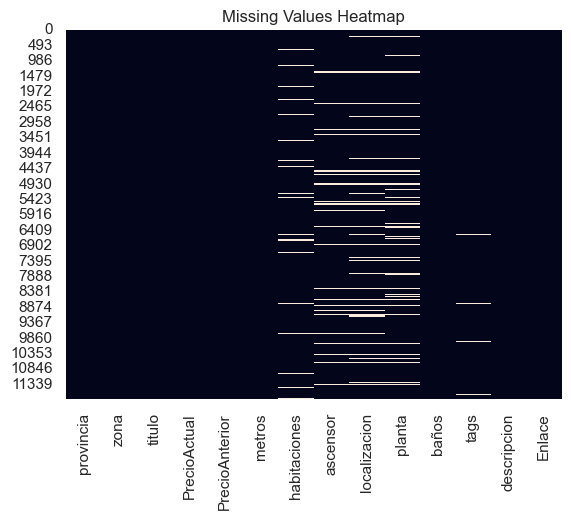

In [31]:
# ==============================
# Block 4: Missing values analysis
# ==============================
# Count missing values per column
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing

# Optional: visualize missing values
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

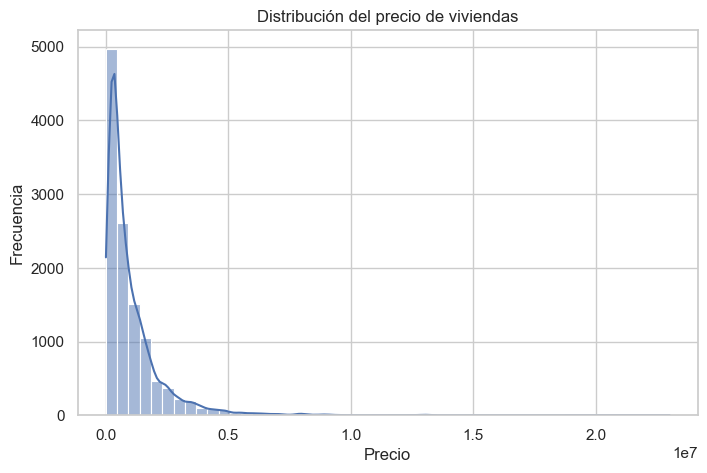

In [ ]:
# ==============================
# Block 5: Target variable distribution
# ==============================
# Adjust the column name of the price according to your dataset
target_col = 'PrecioActual' 

plt.figure(figsize=(8,5))
sns.histplot(df[target_col], kde=True, bins=50)
plt.title("Distribución del precio de viviendas")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

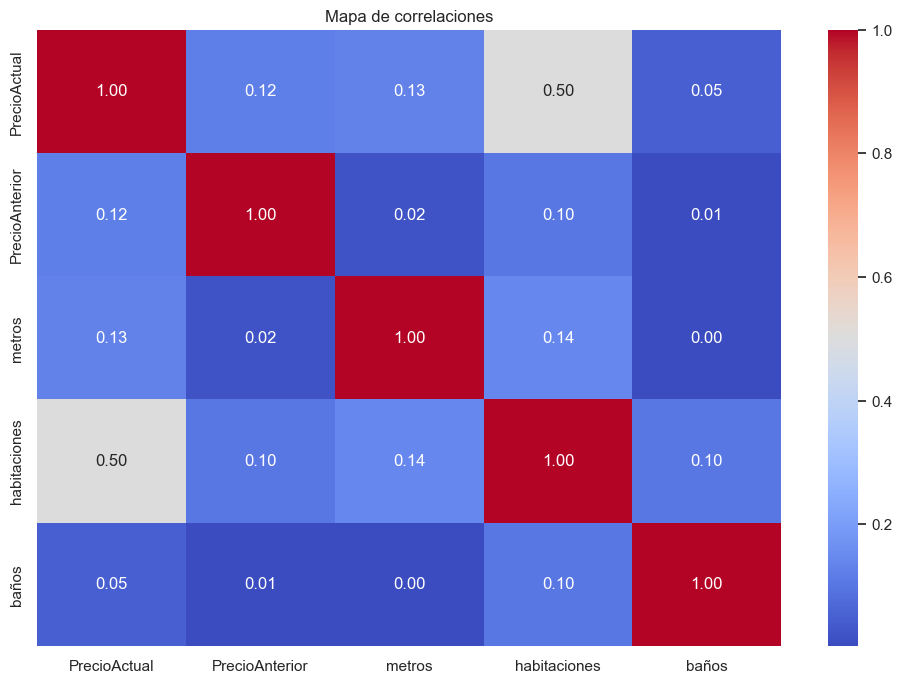

In [33]:
# ==============================
# Block 6: Correlations between numeric variables
# ==============================
numeric_cols = df.select_dtypes(include=np.number).columns  # select only numeric columns

plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Mapa de correlaciones")
plt.show()

In [34]:
# ==============================
# Block 7: Quick check of categorical variables
# ==============================
categorical_cols = df.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    print(f"\nColumna: {col}")
    print(df[col].value_counts().head(10))


Columna: provincia
provincia
madrid    11826
Name: count, dtype: int64

Columna: zona
zona
barrio-de-salamanca    2018
centro                 1890
chamberi                796
chamartin               706
tetuan                  596
moncloa                 580
carabanchel             567
ciudad-lineal           537
puente-de-vallecas      526
retiro                  508
Name: count, dtype: int64

Columna: titulo
titulo
Piso en Goya, Madrid                    203
Piso en Recoletos, Madrid               192
Piso en Castellana, Madrid              135
Piso en Malasaña-Universidad, Madrid    103
Piso en Lista, Madrid                   102
Piso en Chueca-Justicia, Madrid          88
Piso en Almagro, Madrid                  87
Piso en Palacio, Madrid                  81
Piso en El Viso, Madrid                  80
Piso en Sol, Madrid                      76
Name: count, dtype: int64

Columna: ascensor
ascensor
S    8419
N    2614
Name: count, dtype: int64

Columna: localizacion
localizacion
EX

In [35]:
# ==============================
# Block 8: Data cleaning and save processed dataset
# ==============================

# Example cleaning steps:

# 1 Drop rows with missing target values
df = df.dropna(subset=[target_col])

# 2 Fill missing values for numeric columns with median
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

# 3 Fill missing values for categorical columns with mode
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Optional: Remove duplicates
df = df.drop_duplicates()

# Save cleaned dataset to processed folder
processed_path = "../data/processed/Datos_cleaned.csv"
df.to_csv(processed_path, index=False)
print(f"Cleaned dataset saved to {processed_path}")

Cleaned dataset saved to ../data/processed/Datos_cleaned.csv


C:\Users\PYTHON PROG\AppData\Local\Temp\ipykernel_10232\4156061313.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\PYTHON PROG\AppData\Local\Temp\ipykernel_10232\4156061313.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [36]:
# ==============================
# Block 9: Feature encoding and preparation
# ==============================

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# 1 Identify categorical and numeric features
numeric_features = df.select_dtypes(include=np.number).columns.tolist()
numeric_features.remove(target_col)  # remove target from features
categorical_features = df.select_dtypes(include='object').columns.tolist()

# 2 Define preprocessing steps
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# 3 Prepare features (X) and target (y)
X = df.drop(columns=[target_col])
y = df[target_col]

# 4 Fit and transform features
X_processed = preprocessor.fit_transform(X)

print("Features prepared for modeling.")
print(f"Processed features shape: {X_processed.shape}")


Features prepared for modeling.
Processed features shape: (11826, 36676)


In [39]:
import os
import joblib

# ==============================
# Block 10: Split data and save preprocessing pipeline
# ==============================

from sklearn.model_selection import train_test_split

# 1️⃣ Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

# 2️⃣ Save preprocessing pipeline in the correct folder
# Get project root (one level up from notebooks)
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Create processed folder if it doesn't exist
os.makedirs(os.path.join(project_root, "data/processed"), exist_ok=True)

# Save pipeline
pipeline_path = os.path.join(project_root, "data/processed/preprocessor.pkl")
joblib.dump(preprocessor, pipeline_path)

print(f"Preprocessing pipeline saved to {pipeline_path}")


Training set shape: (9460, 36676), Test set shape: (2366, 36676)
Preprocessing pipeline saved to c:\Users\PYTHON PROG\Desktop\PythonAndFiles\prediccion-precios-viviendas\data/processed/preprocessor.pkl
